# K-Means Clustering and Its Business Use-Case

## What is K-Means Clustering?


<b>K Means</b> is one of unsupervised learning, which is used when you have unlabeled data. The goal of this algorithm is to find groups in data based on similarity, with the number of clusters represented by the variable K. The algorithm randomly assigns each observation to a cluster, and finds the centroid of each cluster. Then, the algorithm iterates through two steps:
<ol>
  <li>Reassign data points to the cluster whose centroid is closest.</li>
  <li>Calculate new centroid of each cluster.</li>
</ol>

These two steps are repeated till the within cluster variation cannot be reduced any further. The within cluster variation is calculated as the sum of the euclidean distance between the data points and their respective cluster centroids.

## Exploring the data

The iris dataset contains data about sepal length, sepal width, petal length, and petal width of flowers of different species. Let us see what it looks like:

In [1]:
library(datasets)
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


After a little bit of exploration, I found that Petal.Length and Petal.Width were similar among the same species but varied considerably between different species, as demonstrated below:

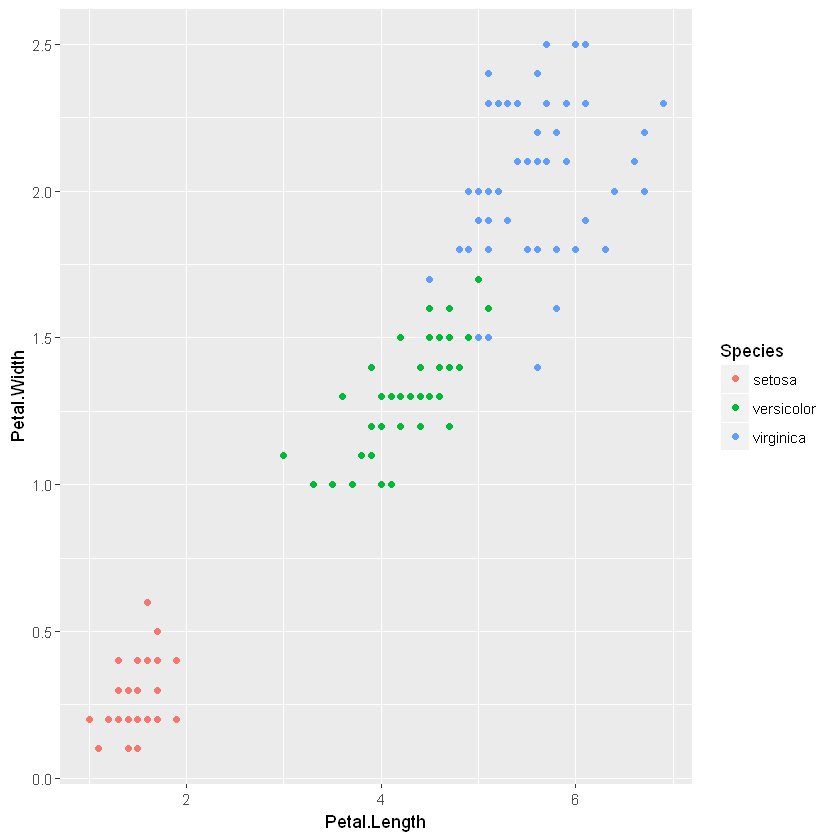

In [2]:
library(ggplot2)
ggplot(iris, aes(Petal.Length, Petal.Width, color = Species)) + geom_point()

## Clustering

In [3]:
set.seed(20)
irisCluster <- kmeans(iris[, 3:4], 3, nstart = 20)
irisCluster

K-means clustering with 3 clusters of sizes 50, 52, 48

Cluster means:
  Petal.Length Petal.Width
1     1.462000    0.246000
2     4.269231    1.342308
3     5.595833    2.037500

Clustering vector:
  [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 3 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 2 3 3 3 3
[112] 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3
[149] 3 3

Within cluster sum of squares by cluster:
[1]  2.02200 13.05769 16.29167
 (between_SS / total_SS =  94.3 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

Since we know that there are 3 species involved, we ask the algorithm to group the data into 3 clusters, and since the starting assignments are random, we specify nstart = 20. This means that R will try 20 different random starting assignments and then select the one with the lowest within cluster variation.
We can see the cluster centroids, the clusters that each data point was assigned to, and the within cluster variation.

Let us compare the clusters with the species (Confusion Matrix)

In [4]:
table(irisCluster$cluster, iris$Species)

   
    setosa versicolor virginica
  1     50          0         0
  2      0         48         4
  3      0          2        46

As we can see, the data belonging to the setosa species got grouped into cluster 3, versicolor into cluster 2, and virginica into cluster 1. The algorithm wrongly classified two data points belonging to versicolor and four data points belonging to virginica.

We can also plot the data to see the clusters:

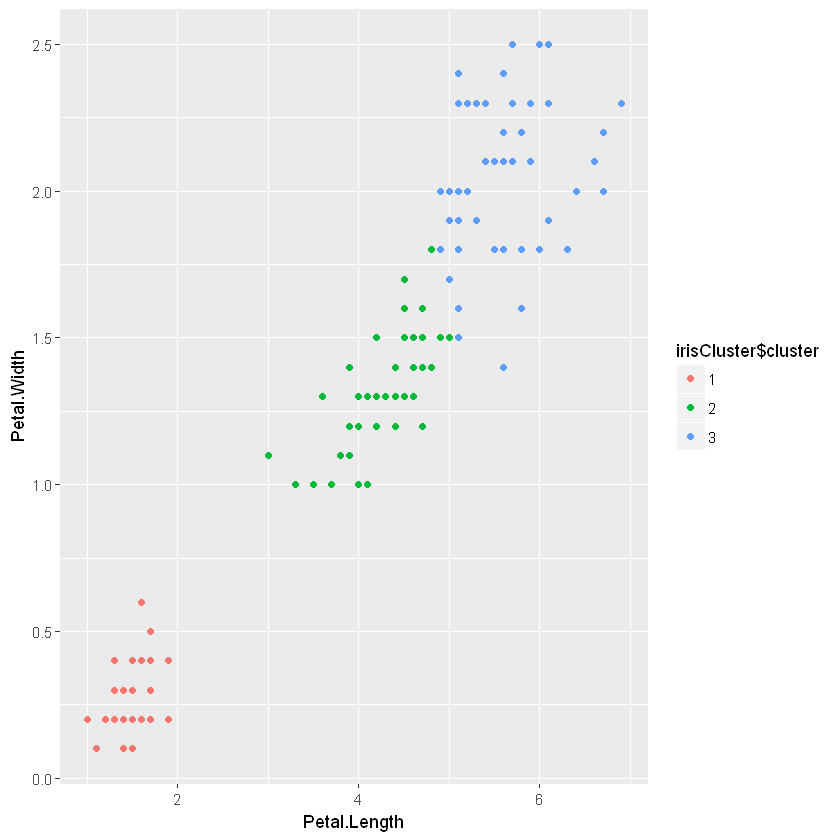

In [5]:
irisCluster$cluster <- as.factor(irisCluster$cluster)
ggplot(iris, aes(Petal.Length,Petal.Width, color=irisCluster$cluster))+geom_point()

## Business Use-Case

The K-means clustering algorithm is used to find groups which have not been explicitly labeled in the data. This can be used to confirm business assumptions about what types of groups exist or to identify unknown groups in complex data sets. Once the algorithm has been run and the groups are defined, any new data can be easily assigned to the correct group.

This is a versatile algorithm that can be used for any type of grouping. Some examples of use cases are:


<ol>
<li>
<b>Behavioral segmentation: </b>
<ul>
<li>Segment by purchase history</li>
<li>Segment by activities on application, website, or platform</li>
<li>Define personas based on interests</li>
<li>Create profiles based on activity monitoring</li>
</ul>
</li>


<li>
<b>Inventory categorization:</b>
<ul>
<li>Group inventory by sales activity</li>
<li>Group inventory by manufacturing metrics</li>
</ul>
</li>

<li>
<b>Sorting sensor measurements: </b>
<ul>
<li>Detect activity types in motion sensors</li>
<li>Group images</li>
<li>Separate audio</li>
<li>Identify groups in health monitoring</li>
</ul>
</li>

<li>
<b>Detecting bots or anomalies: </b>
<ul>
<li>Separate valid activity groups from bots</li>
<li>Group valid activity to clean up outlier detection</li>
</ul>
</li>

</ol>
